In [5]:
import numpy as np
import matplotlib.pyplot as plt

In [6]:
# parameters of the true (unknown) demand model
true_slop = 30
true_intercept = -5

In [7]:
eta = 0.999
num_episodes = 200
stock = 200
prices = [1.99, 2.49, 2.99, 3.49, 3.99, 4.49]
horizon_steps = 5
initial_price = 5
lambda2 = 0.01

In [8]:
def retrieve_linear_demand(a): 
    demand = true_slop + true_intercept * prices[a]
    return np.random.poisson(demand, 1)[0]

In [9]:
Q = np.zeros((stock+1,len(prices)),dtype=float)

In [10]:
num_visited = np.zeros((stock+1,len(prices)), dtype=float)

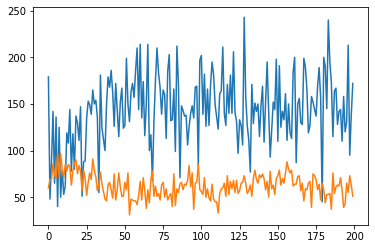

In [11]:
rList = []
dList = []
for k in range(num_episodes):
    x = stock
    a = initial_price
    num_visited[x][a] = num_visited[x][a] + 1
    r_acum = 0
    d_acum = 0
    for t in range(horizon_steps):
        observed_demand = retrieve_linear_demand(a)
        x_ = x - observed_demand
        if (x_ < 0):
            x_ = 0
            observed_demand = x
        r = observed_demand * a
        r_acum = r_acum + r
        d_acum = d_acum + observed_demand
        if np.random.uniform(0, 1) <= (1/(k+1)):
            a_ = np.random.choice(len(prices))
        else:
            a_ = np.argmax(Q, axis=1)[x_]
        num_visited[x_][a_] = num_visited[x_][a_] + 1
        delta = r + eta * Q[x_][a_] - Q[x][a]
        for xx in range(stock):
            for aa in range(len(prices)):
                Q[xx][aa] = Q[xx][aa] + (1 / (num_visited[xx][aa] + 1)) * delta
        x = x_
        a = a_
    rList.append(r_acum)
    dList.append(d_acum)
plt.plot(rList)
plt.plot(dList)

In [12]:
rList

[179,
 48,
 88,
 142,
 65,
 136,
 40,
 125,
 50,
 79,
 53,
 62,
 119,
 108,
 144,
 78,
 118,
 80,
 137,
 130,
 111,
 147,
 51,
 88,
 89,
 135,
 153,
 149,
 139,
 165,
 150,
 154,
 136,
 55,
 181,
 124,
 112,
 100,
 149,
 179,
 168,
 186,
 163,
 126,
 172,
 144,
 115,
 152,
 167,
 124,
 127,
 199,
 150,
 131,
 163,
 172,
 157,
 186,
 210,
 144,
 214,
 135,
 174,
 116,
 150,
 214,
 100,
 117,
 68,
 132,
 176,
 210,
 183,
 168,
 139,
 165,
 160,
 113,
 185,
 203,
 132,
 133,
 166,
 99,
 212,
 172,
 71,
 148,
 143,
 137,
 138,
 106,
 126,
 140,
 148,
 135,
 168,
 169,
 83,
 197,
 202,
 139,
 182,
 126,
 166,
 127,
 170,
 195,
 181,
 149,
 136,
 123,
 161,
 164,
 211,
 140,
 127,
 171,
 140,
 181,
 140,
 206,
 141,
 131,
 97,
 133,
 127,
 106,
 243,
 158,
 127,
 111,
 77,
 171,
 129,
 151,
 142,
 150,
 115,
 148,
 169,
 109,
 151,
 195,
 142,
 93,
 122,
 152,
 144,
 198,
 110,
 191,
 125,
 142,
 133,
 161,
 111,
 150,
 119,
 113,
 184,
 200,
 87,
 150,
 156,
 130,
 128,
 199,
 190,
 166,
 1